<a href="https://colab.research.google.com/github/f-ssemwanga/MachineLearning_DeepLearning/blob/main/005NeuralNetworkRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to regression with Neural Networks in Tensor Flow

* Regression problem is the predicting of a numberical variable based on some other combination  of variables   


In [2]:
#Get some data
import tensorflow as tf
print(f'Tensorflow Version: {tf.__version__}')

Tensorflow Version: 2.11.0


***Creating data to view and fit***

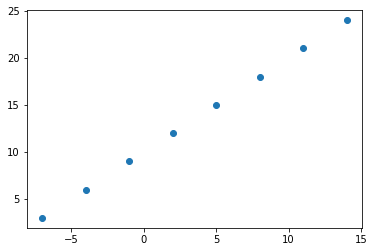

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#create features / predictions
x = np.array([-7.0, -4.0, -1.0,2.0, 5.0, 8.0, 11.0, 14.0 ])
#create labels
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
#visualise it
plt.scatter(x,y)

In [7]:
#from the above
y == x+10 # this is the function / relationship we want our Neural Network to learn


array([ True,  True,  True,  True,  True,  True,  True,  True])

##input and output shapes
* if we are to build a model between x and y what might be the shapes of the input and output?

In [8]:
#create a demo tensor for the housing price preduction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
#input and output shape for the scatter above
input_shape = x.shape
output_shape =y.shape
input_shape, output_shape

((8,), (8,))

In [10]:
#use one input i.e. one x value/ feature to predict one y value/ feature
x[0], y[0] 

(-7.0, 3.0)

In [11]:
x[1],y[1]

(-4.0, 6.0)

In [13]:
#Turn numpy arrays into tensors
x =tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

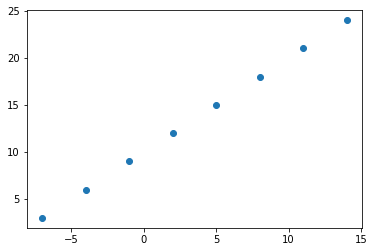

In [17]:
plt.scatter(x,y)

##**Steps in modelling with TensorFlow**

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile the model** - define the **loss function** (tells the mode how wrong it is), the **optimiser** (tells the model how to improve the patterns it is learning and **Evaluation metrics** (we use these to interpret the performance of a our model)
3. **Fitting a mode** - letting the model try to find the patterns between x and y (features and labels)

*side note: The choice of 42 as a seed value is somewhat arbitrary, but it has become a convention in the programming community due to its association with the book "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, where it is famously referred to as the "Answer to the Ultimate Question of Life, the Universe, and Everything."*

* mae - **mean absolute Error** - commonly used loss function for regression problems.  Measures the average absloute difference between the predicted and actual values. **It measures the accuracy of the model's predictions i.e. on average how wrong are the predictions**
* A lower mae indicates the model is better at predicting the target variable, normally used in conjunction with the RMSE (root mean square error) to get a better understanding of the model's performance
* sgd **stochastic gradient decent** - optimisation algorithm which minimises the loss function during the training process - basically tells the optimiser how to improve



In [21]:
#set random seed for reproducibility
tf.random.set_seed(42)
'''#following creation, compile and fitting from documentation
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense([1]))
model.compile(optimizer="sgd", loss='mae')
model.fit(x,y,batch_size=32, epochs=5)'''

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)# because we need 1 input to predict one output in this example
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #loss mae means mean absloute error
              optimizer ="sgd", #sgd is stochastic gradient decent
              metrics=["mae"]) 


In [18]:
#check data types before fitting
x.dtype, y.dtype


(tf.float64, tf.float64)

In [27]:
#As keras dense layer uses float32 we will change the type before fitting the model
x =tf.cast(x,tf.float32)
y =tf.cast(y, tf.float32)

#now fit the model
#3. Fit the model
#The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).
model.fit(tf.expand_dims(x, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 26ms/step - loss: 12.1982 - mae: 12.1982
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 12.0657 - mae: 12.0657
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.9332 - mae: 11.9332
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.8007 - mae: 11.8007
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 11.6682 - mae: 11.6682


In [29]:
#Use the model above to make a prediction
#check out x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [31]:
#try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 44ms/step


array([[8.017537]], dtype=float32)

##Improving the Neural Network Model's performance
We can improve the model by altering the steps taken to create it
1. **Creating a Model** 
  * Add more layers, 
  * increase number of hidden units (neurons) within each hidden layer
  * change the activation function of each layer
2. **Compiling a model**
  * Change the optimization function
  * change the **learning rate (lr)** of the optimization function - the higher the rate the more the optimization algorithm pushes the model to improve
3. **Fitting a model**
  * fit the model for more epochs (leave it training for longer)
  * more data (give the model more examples to learn from)

In [33]:
#Improving the model by improving the epochs
#Create the model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer="sgd",
              metrics =['mae'])
#Fit the model (this time training for longer)
model.fit(tf.expand_dims(x, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 321ms/step - loss: 8.1635 - mae: 8.1635
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.0310 - mae: 8.0310
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8985 - mae: 7.8985
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7660 - mae: 7.7660
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6335 - mae: 7.6335
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5010 - mae: 7.5010
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4550 - mae: 7.4550
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4494 - mae: 7.4494
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4438 - mae: 7.4438
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4381 - mae: 7.4381
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - los

In [34]:
#remind ouselves of the data
x,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [35]:
#See if model prediction has improved
model.predict([17.0])


1/1 [==============================] - 0s 57ms/step


array([[30.255116]], dtype=float32)

##Improve model by altering the optimiser algorithm

In [50]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#compile the model and change the optimiser (Change the optimiser algorithm to adam)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics =['mae'])
#fit the model
data =tf.expand_dims(x, axis=-1)
model.fit(data,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 398ms/step - loss: 14.0715 - mae: 14.0715
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8215 - mae: 11.8215
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5715 - mae: 9.5715
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 7.3215 - mae: 7.3215
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 6.3010 - mae: 6.3010
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2492 - mae: 7.2492
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4918 - mae: 7.4918
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0932 - mae: 7.0932
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.2575 - mae: 6.2575
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 5.1059 - mae: 5.1059
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss:

In [51]:
#See if model prediction has improved
model.predict([17.0])


1/1 [==============================] - 0s 59ms/step


array([[27.677097]], dtype=float32)